# Business Problem

* A credit card company has a dataset which includes demographic and financial data for 6 months. 
* Labelled data - default/no default
* 30,000 rows- each row for a cc a/c holder
*GOAL - Build a predictive model that will predict the default in the next month given the demographics and financial data.


# Data Source
1. https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
The UCI Machine Learning Repository is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.
2. It shows the credit card default payments in a bank in Taiwan.




# 1. Data Exploration and Cleaning


1. Load dataset
2. Exploratory data analysis

### Loading data

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving default of credit card clients.csv to default of credit card clients.csv


In [ ]:
df = pd.read_csv('default of credit card clients.csv',header=1 )

### Exploring the data

In [ ]:
df.shape 

(30000, 25)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## Understanding the Variables
1. Limit bal is credit given includes both the individual consumer credit and his/her family (supplementary) credit.
2. Gender (1 = male; 2 = female).
3.  Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
4. Marriage- Marital status (1 = married; 2 = single; 3 = others).
5.  Age (year).
6. History of past payment. Tracked the past monthly payment records (from April to September, 2005) as follows: PAY_0 = the repayment status in September, 2005; PAY_0 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
7. Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.
8.  Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT6 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

### Qustions for data exploration
I will try to answer these questions
1. How many columns are there in the data? - 25
2. How many rows? - 30,000
3. What kind of features are there? Categorical vs numerical?
4. What does the data look like in these features? What is the range of values in numeric features? What is frequency of different classes in categorical features?
5. Are there any missing values? - No missing values.

### Sanity Check
Check if the number of unique a/c id is the same as number of rows.
* Yes, it is same.

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
df['ID'].nunique()

30000

### Examine the values of features and response

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

1. No null values
2. All columns have int64 dtypes

In [ ]:
df['PAY_0'].head(5)

0    2
1   -1
2    0
3    0
4   -1
Name: PAY_0, dtype: int64

What does it mean?
History of past payment. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. From https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients.

In [ ]:
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

What are the values 0 and -2?
* -2 means a/c started with zero balance and never used any credit.
* 0 means that the minimum balance was paid but a part of it was carried over to next month.

### Bar Graphs

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Payment Status of 1st month')

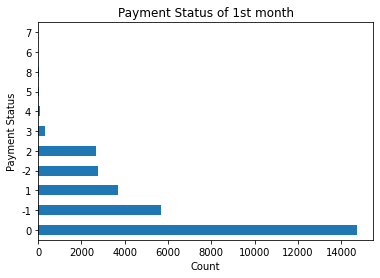

In [ ]:
df['PAY_0'].value_counts().plot(kind = 'barh')
plt.xlabel("Count")
plt.ylabel("Payment Status")
plt.title("Payment Status of 1st month") 

Text(0.5, 1.0, 'Payment Status of 2nd month')

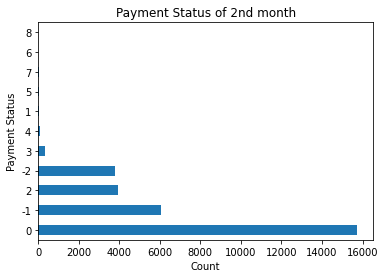

In [ ]:
df['PAY_2'].value_counts().plot(kind = 'barh')
plt.xlabel("Count")
plt.ylabel("Payment Status")
plt.title("Payment Status of 2nd month") 

Text(0.5, 1.0, 'Payment Status of 3rd month')

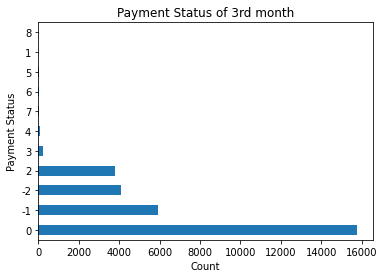

In [ ]:
df['PAY_3'].value_counts().plot(kind = 'barh')
plt.xlabel("Count")
plt.ylabel("Payment Status")
plt.title("Payment Status of 3rd month") 

Text(0.5, 1.0, 'Payment Status of 4th month')

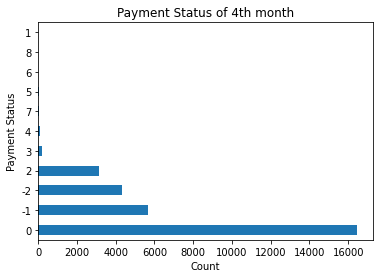

In [ ]:
df['PAY_4'].value_counts().plot(kind = 'barh')
plt.xlabel("Count")
plt.ylabel("Payment Status")
plt.title("Payment Status of 4th month")

Text(0.5, 1.0, 'Payment Status of 5th month')

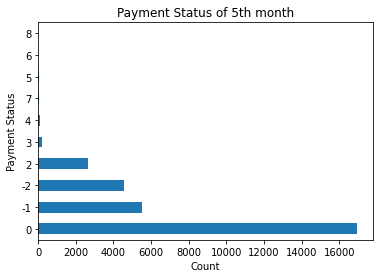

In [ ]:
df['PAY_5'].value_counts().plot(kind = 'barh')
plt.xlabel("Count")
plt.ylabel("Payment Status")
plt.title("Payment Status of 5th month") 

Text(0.5, 1.0, 'Payment Status of 6th month')

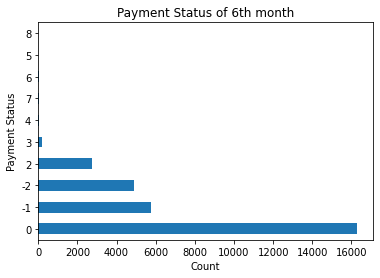

In [ ]:
df['PAY_6'].value_counts().plot(kind = 'barh')
plt.xlabel("Count")
plt.ylabel("Payment Status")
plt.title("Payment Status of 6th month")

Observations:
1. 0 is most common -around 50% of cc holders pay the minimum balance and part of the payment is carried forward 
2. around 20 % of customers pay in full
3. Payment delay of 2 months more common than payment delay of 1 month

So far...looked at columns ID and payment status for each month. Let us look at demographic features(marriage, age, sex, education) and limit balance.
* Here age and limit balance are continuous data, so we can plot histograms.

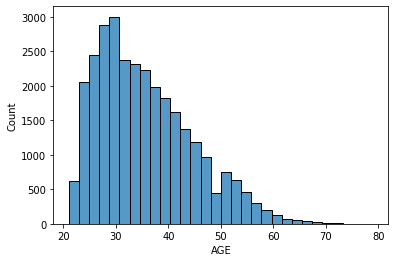

In [ ]:
sns.histplot(df, x = 'AGE', bins = 30)

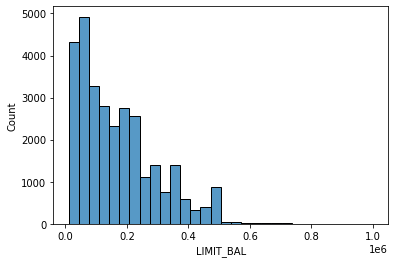

In [ ]:
sns.histplot(df, x = 'LIMIT_BAL', bins = 30)

In [ ]:
df['LIMIT_BAL'].max()

1000000

In [ ]:
df['LIMIT_BAL'].min()

10000

In [ ]:
# Let us get the summary statistics 
df[['AGE', 'LIMIT_BAL']].describe()

,AGE,LIMIT_BAL
count,30000.000000,30000.000000
mean,35.485500,167484.322667
std,9.217904,129747.661567
min,21.000000,10000.000000
25%,28.000000,50000.000000
50%,34.000000,140000.000000
75%,41.000000,240000.000000
max,79.000000,1000000.000000


Now let us look at categorical features.

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Here, 2= university education, 1= masters, 3 = high school, 4 = others.
There is no mention of 0, 5 and 6. So we will lump them with others = 4.

In [ ]:
df['EDUCATION'].replace(to_replace = [0, 5, 6], value = 4, inplace = True)

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [ ]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Here, 1 =  married, 2 = single, 3 = others. We don't know what 0 is so we'll lump it with others = 3.

In [ ]:
df['MARRIAGE'].replace(to_replace = 0, value = 3, inplace = True)

In [ ]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Let us look at proportions of defaults within each education level. ORDINAL ENCODING

Text(0.5, 0, 'Education level : ordinal encoding')

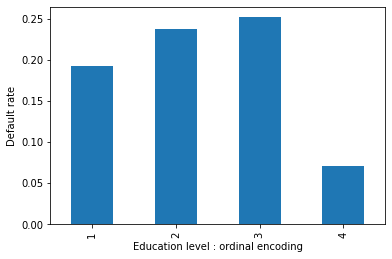

In [ ]:
df.groupby('EDUCATION').agg({'default payment next month': 'mean'}).plot.bar(legend = False)
plt.ylabel('Default rate')
plt.xlabel('Education level : ordinal encoding')

### One Hot Encoding for Education
1. We will recreate a column that has strings instead of numbers for education. 1 = masters, 2 = university, 3 = high school, 4 = others. 
2. Do a OHE.

In [ ]:
df['EDUCATION_CAT'] = 'none' # creates an empty column of categorical variables

In [ ]:
df[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [ ]:
# create a dictionary
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [ ]:
df['EDUCATION_CAT'] = df['EDUCATION'].map(cat_mapping)

In [ ]:
df[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [ ]:
edu_ohe = pd.get_dummies(df['EDUCATION_CAT'])

In [ ]:
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [ ]:
df = pd.concat([df, edu_ohe], axis = 1)

In [ ]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,university,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,university,0,0,0,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,university,0,0,0,1
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,university,0,0,0,1
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,university,0,0,0,1
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,graduate school,1,0,0,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,graduate school,1,0,0,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,university,0,0,0,1
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,high school,0,1,0,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,high school,0,1,0,0


### Downloading as csv and saving to drive

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
df.to_csv('Cleaned_data.csv')
!cp Cleaned_data.csv "drive/My Drive/"

### Exploring Financial History features of dataset

In [ ]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head() # payment status in July(PAY 3) of accounts with 2 - month delay in August(PAY_2)

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
50,2,2


The only way to progress from a two month delay in August is to have a one month delay in July. None of these accounts indicate that. So we will include only data from most recent month, that is PAY_0 in analysis.

# Summary
1. Observed inconcistency in the data. Have to throw away some data. We will only keep data from most recent month.
2. Around 15% of customers start with 0 balance and never use any credit.
3. around 20 % of customers pay in full
4. Payment delay of 2 months more common than payment delay of 1 month


# Relationship between features and response

We remove the features found to have errors in the EDA.

In [ ]:
features_response = df.columns.tolist()

In [ ]:
features_response[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [ ]:
features_response[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [ ]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_CAT', 'graduate school', 'high school', 'others', 'none', 'university' ]

In [ ]:
features_response = [item for item in features_response if item not in items_to_remove]

In [ ]:
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

### Pearson Correlation

In [ ]:
corr = df[features_response].corr()

In [ ]:
corr.iloc[0:5, 0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0
LIMIT_BAL,1.000000,-0.231088,-0.111012,0.144713,-0.271214
EDUCATION,-0.231088,1.000000,-0.136797,0.182434,0.112593
MARRIAGE,-0.111012,-0.136797,1.000000,-0.412001,0.018557
AGE,0.144713,0.182434,-0.412001,1.000000,-0.039447
PAY_0,-0.271214,0.112593,0.018557,-0.039447,1.000000


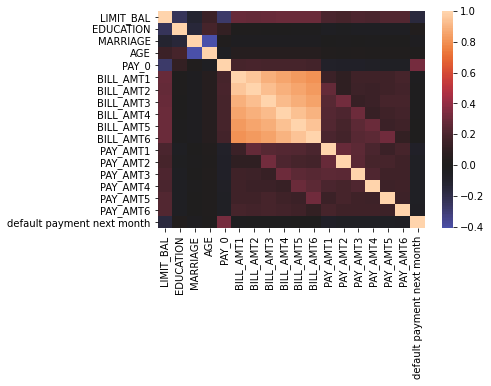

In [ ]:
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, center = 0)

#### Observations
1. Bill amounts are strongly correlated with each other.
2. PAY_0 is the feature most strongly correlated with response variable.
3. LIMIT_BAL has a negative correlation with response variable.

#### ANOVA F-Test
* Pearson Correlation is theoretically valid for only continuous response variables. 
* For Categorical variables, ANOVA F-test is used. 

In [ ]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(30000, 17) (30000,)


In [ ]:
from sklearn.feature_selection import f_classif #import the f_classif function

In [ ]:
[f_stat, f_p_value] = f_classif(X, y)

In [ ]:
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
'F statistic':f_stat,
'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_0,3537.714970,0.000000e+00
0,LIMIT_BAL,724.068539,1.302244e-157
11,PAY_AMT1,160.403810,1.146488e-36
12,PAY_AMT2,103.291524,3.166657e-24
14,PAY_AMT4,97.188000,6.830942e-23
13,PAY_AMT3,95.218011,1.841770e-22
15,PAY_AMT5,91.429801,1.241345e-21
16,PAY_AMT6,85.089045,3.033589e-20
1,EDUCATION,34.395999,4.543558e-09
2,MARRIAGE,22.826769,1.781170e-06


#### Observations
* PAY_0 and LIMIT_BAL have the smallest p-values. 
* This indicates that the average values of these features between the positive and negative classes is significantly different and these classes will help predict which class a sample belongs to.
* PAY_0 is the payment status of the current month. This makes sense: people who have defaulted recently are at the highest risk of defaulting again.
* Riskier clients have lower credit limits, so we may expect higher probability of defaults for a/cs with lower credit limits.

In [ ]:
overall_default_rate = df['default payment next month'].mean()

In [ ]:
overall_default_rate

0.2212

In [ ]:
import numpy as np
group_by_pay_mean_y = df.groupby('PAY_0').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_0,
-2,0.132294
-1,0.167781
0,0.128113
1,0.339479
2,0.691414
3,0.757764
4,0.684211
5,0.500000
6,0.545455


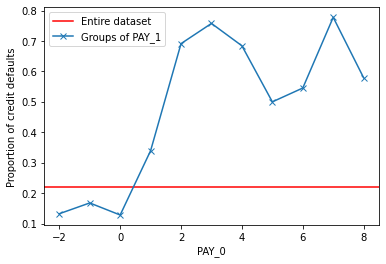

In [ ]:
# plot
axes = plt.axes()
axes.axhline(overall_default_rate, color = 'red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])

This shows that the default rate of accounts in good standing is well below the overall default rate. However, at least 30% of the accounts that were in default last month will again be in default next month.

In [ ]:
# logical masks for positive and negative samples
pos_mask = y == 1
neg_mask = y == 0

Text(0.5, 1.0, 'Credit limits by response variable')

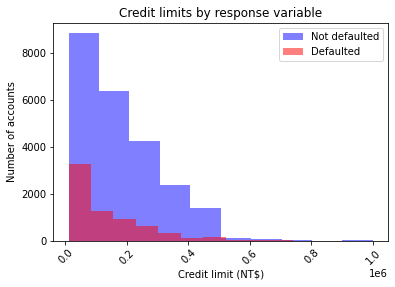

In [ ]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

In [ ]:
bin_edges = list(range(0,850000,50000))
print(bin_edges[-1])

800000


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

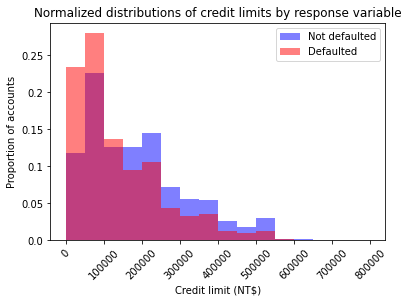

In [ ]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5,
density=True, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5,
density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')

Shows that accounts that default have a higher proportion of lower credit limits. 

# Decision Tree Model

In [ ]:
# importing the necessary modules
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

In [ ]:
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[features_response[:-1]].values, df['default payment next month'].values,test_size=0.2, random_state=24)

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth=2) # instantiating decisoin tree

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dot_data = tree.export_graphviz(dt, out_file=None, filled=True,rounded=True, feature_names=features_response[:-1], proportion=True, class_names=['Not defaulted', 'Defaulted'])

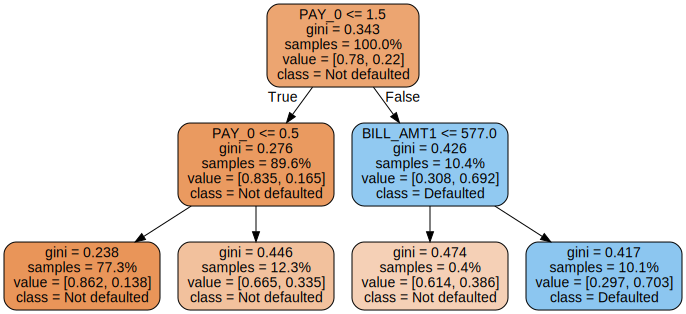

In [ ]:
graph = graphviz.Source(dot_data)
graph

### Finding optimal parameters using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train.shape

(24000, 17)

In [ ]:
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]}

In [ ]:
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc', n_jobs=None, iid=False, refit=True, cv=4, verbose=1,pre_dispatch=None, error_score=np.nan, return_train_score=True)

In [ ]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    4.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=2,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid=False, n_jobs=None,
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             pre_dispatc

In [ ]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.032188,0.001044,0.004278,0.000384,1,{'max_depth': 1},0.648004,0.643337,0.642754,0.639831,0.643482,0.002930,7,0.641974,0.643529,0.643723,0.644698,0.643481,0.000976
1,0.057188,0.001860,0.003787,0.000062,2,{'max_depth': 2},0.699762,0.691998,0.707621,0.694778,0.698540,0.005935,5,0.698155,0.700799,0.695733,0.699830,0.698629,0.001921
2,0.103895,0.001784,0.004070,0.000081,4,{'max_depth': 4},0.742425,0.734975,0.741959,0.742347,0.740427,0.003152,2,0.751144,0.752834,0.747294,0.751292,0.750641,0.002043
3,0.150203,0.002945,0.004186,0.000095,6,{'max_depth': 6},0.737460,0.734833,0.752635,0.750483,0.743853,0.007799,1,0.777490,0.776631,0.773589,0.776855,0.776141,0.001507
4,0.189728,0.001129,0.004402,0.000037,8,{'max_depth': 8},0.721505,0.727596,0.737613,0.728463,0.728795,0.005754,3,0.803933,0.804737,0.801344,0.805828,0.803961,0.001654
5,0.232526,0.002588,0.004495,0.000171,10,{'max_depth': 10},0.706762,0.712696,0.723373,0.705602,0.712108,0.007038,4,0.837739,0.844209,0.838631,0.841147,0.840432,0.002514
6,0.268061,0.003241,0.004537,0.000072,12,{'max_depth': 12},0.669857,0.678461,0.692907,0.659271,0.675124,0.012313,6,0.883677,0.890897,0.879889,0.883893,0.884589,0.003975


In [ ]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

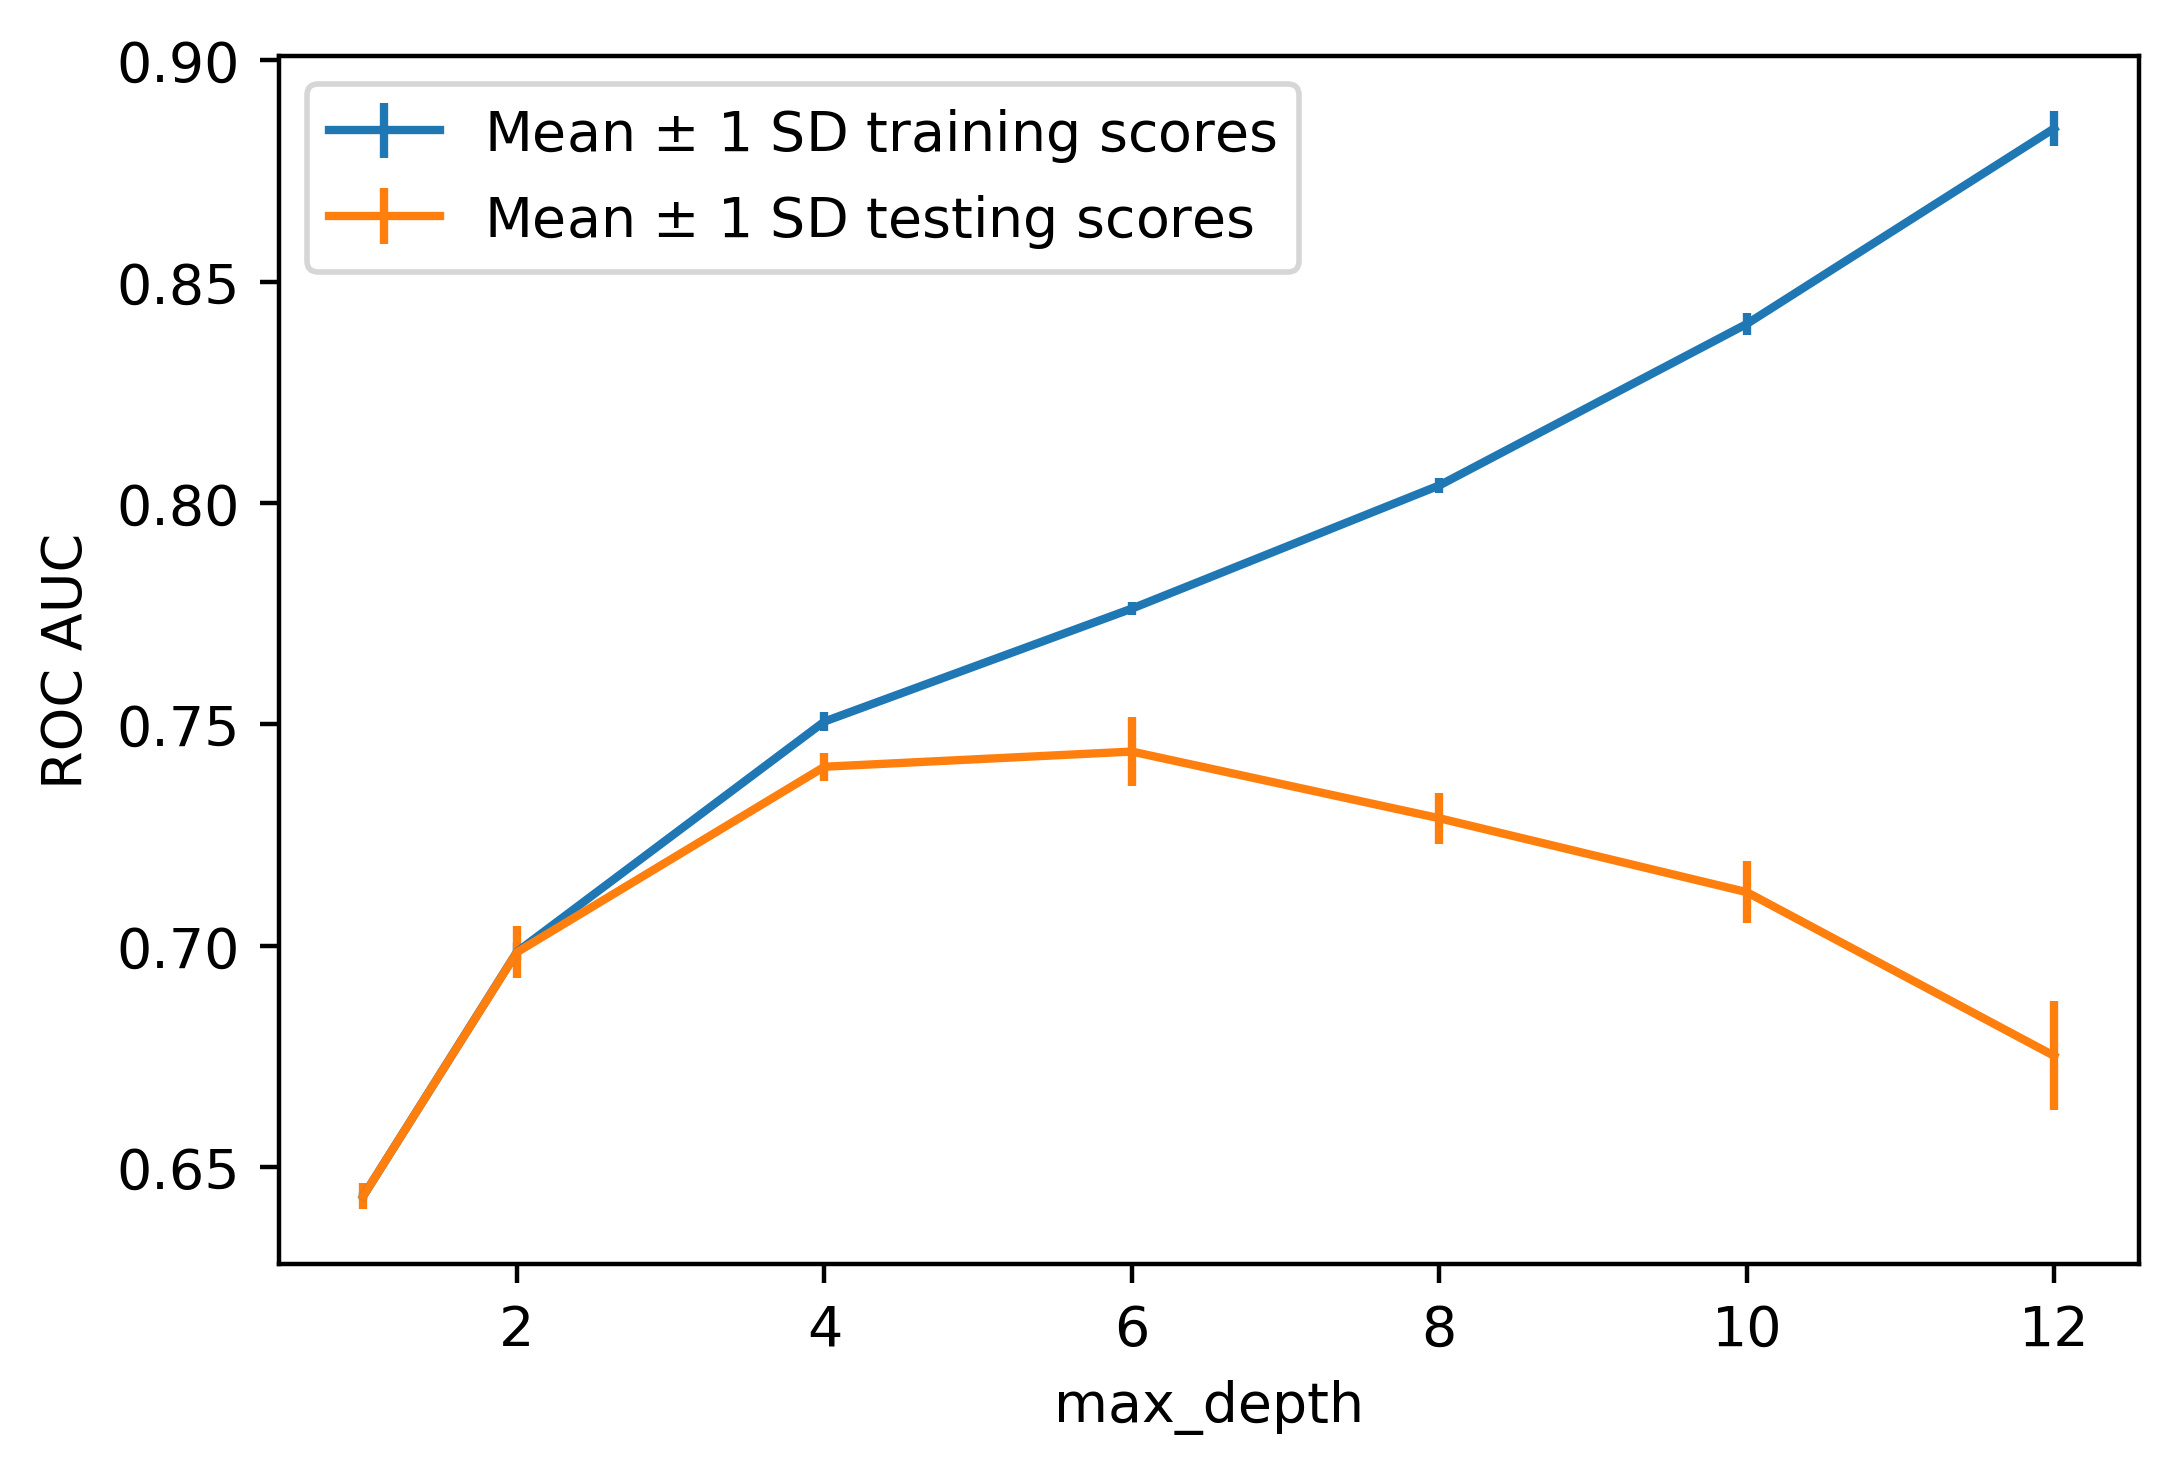

In [ ]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
cv_results_df['mean_train_score'],
yerr=cv_results_df['std_train_score'],
label='Mean $\pm$ 1 SD training scores')
ax.errorbar(cv_results_df['param_max_depth'],
cv_results_df['mean_test_score'],
yerr=cv_results_df['std_test_score'],
label='Mean $\pm$ 1 SD testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.show()

* Thus, we select max_depth = 6.
* ROC AUC is 0.718

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# instantiate this class
rf = RandomForestClassifier(
n_estimators=10, criterion='gini', max_depth=3,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
random_state=4, verbose=0, warm_start=False, class_weight=None)

In [ ]:
rf_params_ex = {'n_estimators':list(range(10,110,10))}

In [ ]:
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex, scoring='roc_auc',n_jobs=None, iid=False, refit=True, cv=4,verbose=1,pre_dispatch=None, error_score=np.nan, return_train_score=True)


In [ ]:
cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   38.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

In [ ]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

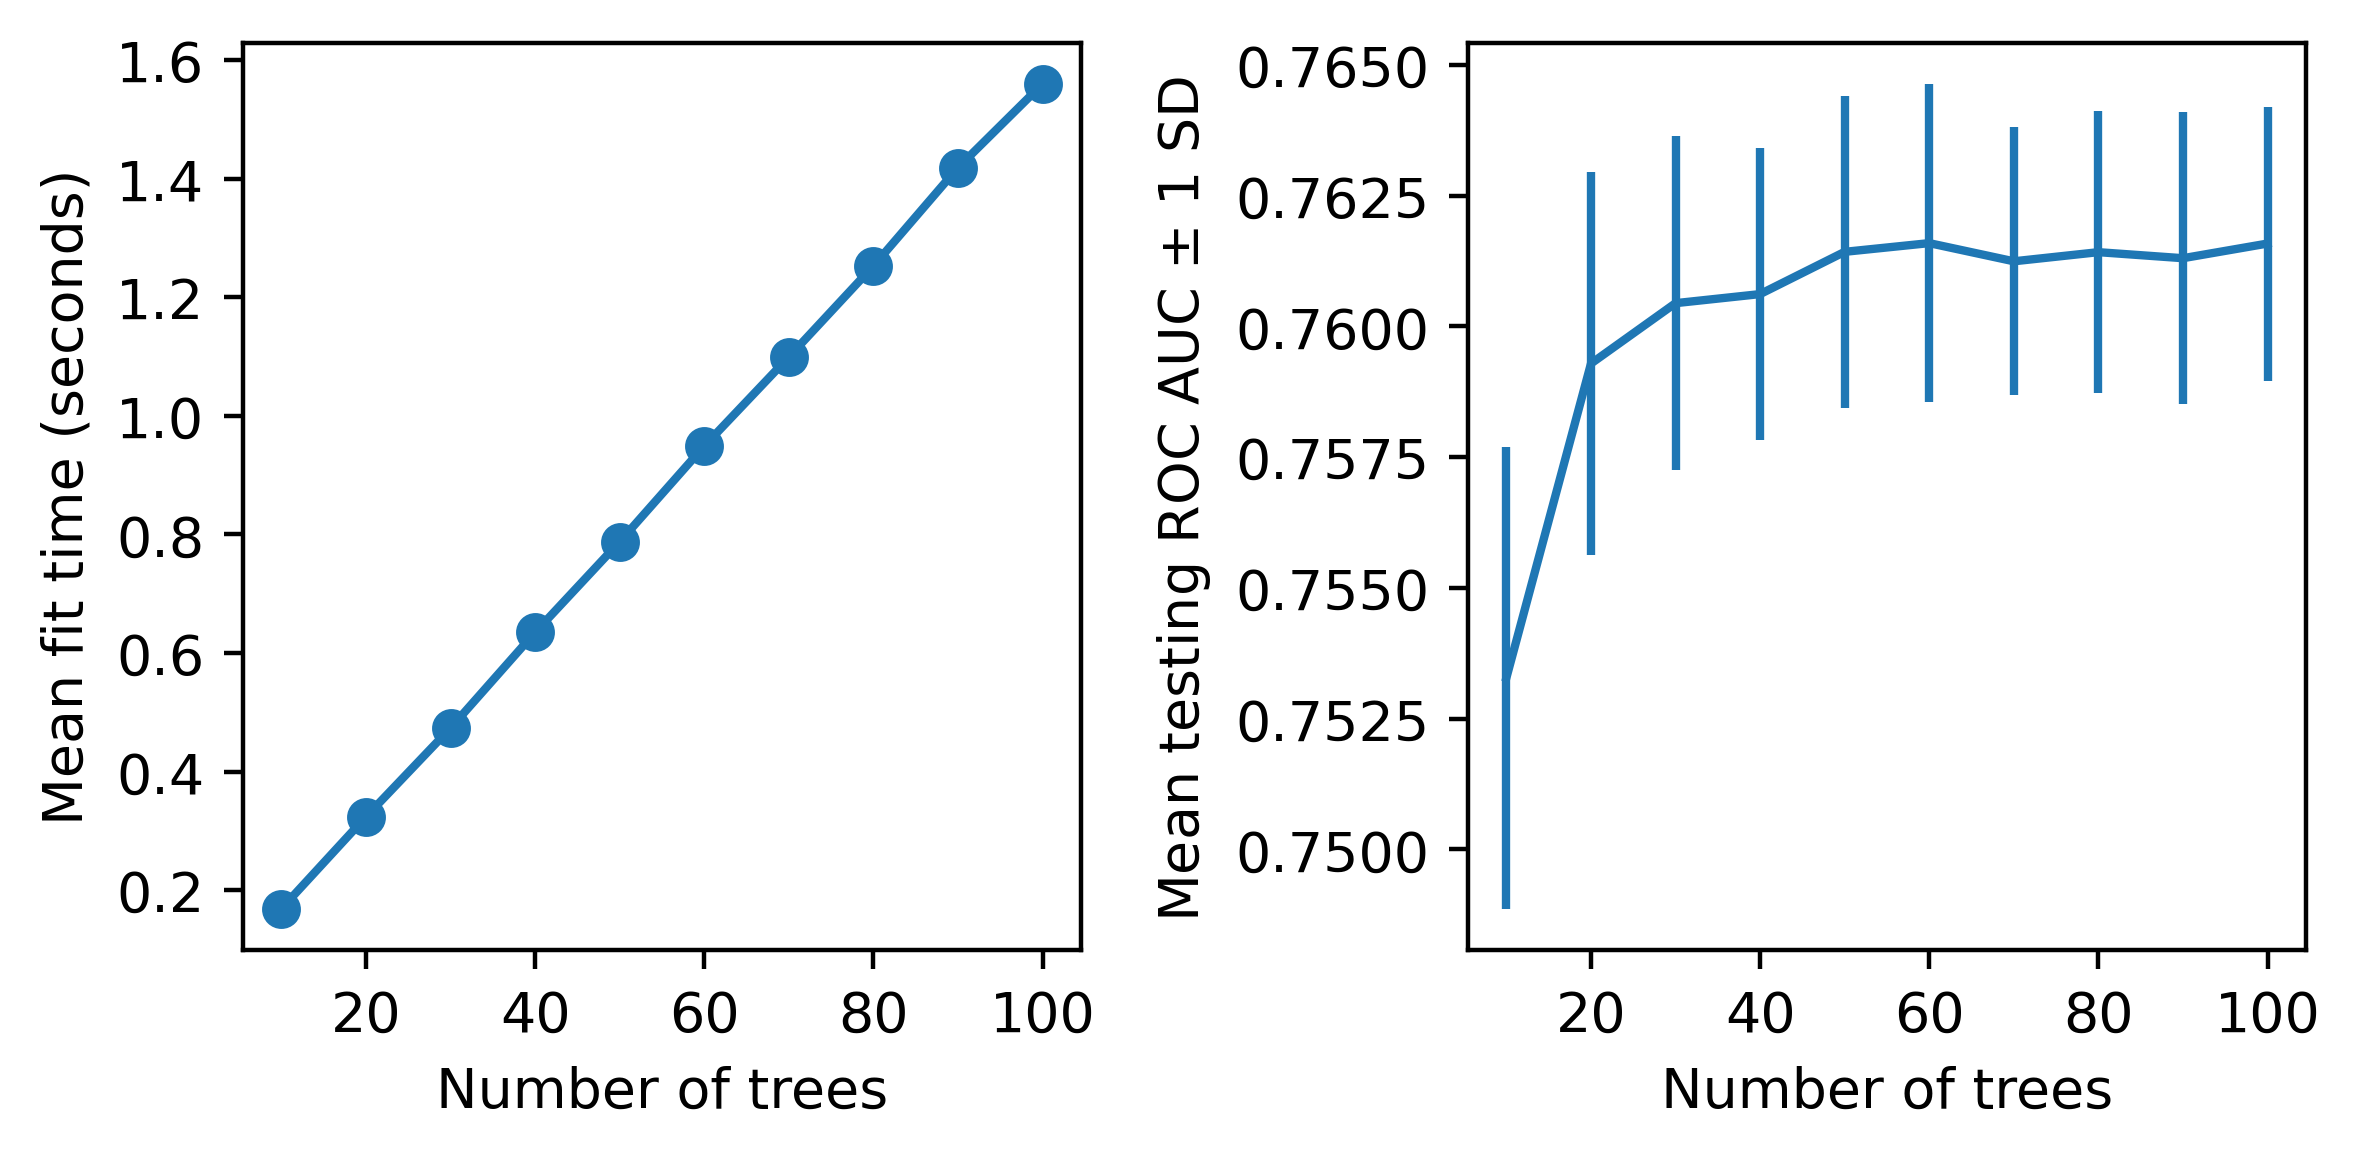

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
cv_rf_ex_results_df['mean_fit_time'],
'-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
cv_rf_ex_results_df['mean_test_score'],
yerr=cv_rf_ex_results_df['std_test_score'])
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD ')
plt.tight_layout()

In [ ]:
cv_rf_ex.best_params_ # ROC AUC 7.6

{'n_estimators': 60}

In [ ]:
feat_imp_df = pd.DataFrame({'Feature name':features_response[:-1], 'Importance':cv_rf_ex.best_estimator_.feature_importances_})
feat_imp_df.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_0,0.624681
11,PAY_AMT1,0.100108
0,LIMIT_BAL,0.077335
12,PAY_AMT2,0.040162
13,PAY_AMT3,0.032703
14,PAY_AMT4,0.031194
6,BILL_AMT2,0.016955
15,PAY_AMT5,0.015007
8,BILL_AMT4,0.013679
7,BILL_AMT3,0.011379


# Financial Analysis

We will characterize the expected costs of the counselling program in terms of costs of offering individual counselling sessions as well as expected savings in terms of prevented defaults. We will select thresholds for model selected probability. There will be different costs and savings at each threshold.

Choose a threshold of
predicted probability at which to declare a positive sample, so that the profits or savings
due to model-guided decision making are maximized.